# Demo - Topic Network Analysis in Online Communities

## Step 1 : Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import re
import spacy
from nltk.corpus import stopwords

from ipynb.fs.full.helper_functions import *

import networkx as nx
from itertools import combinations

import dataframe_image as dfi
import pickle

## Step 2 : Load datasets

In [2]:
# Read data from csv files
'''Ethereum'''
df_eth_1 = pd.read_csv('../data_2.0/ethereum_posts_reddit.csv')
df_eth_2 = pd.read_csv('../data_2.0/ethereum_comments_reddit.csv')

'''Litecoin'''
df_lit_1 = pd.read_csv('../data_2.0/litecoin_posts_reddit.csv')
df_lit_2 = pd.read_csv('../data_2.0/litecoin_comments_reddit.csv')

'''Dogecoin'''
df_dog_1 = pd.read_csv('../data_2.0/dogecoin_posts_reddit.csv')
df_dog_2 = pd.read_csv('../data_2.0/dogecoin_comments_reddit.csv')

'''NEM'''
df_nem_1 = pd.read_csv('../data_2.0/nem_posts_reddit.csv')
df_nem_2 = pd.read_csv('../data_2.0/nem_comments_reddit.csv')

'''Ripple'''
df_rip_1 = pd.read_csv('../data_2.0/ripple_posts_reddit.csv')
df_rip_2 = pd.read_csv('../data_2.0/ripple_comments_reddit.csv')

# '''Binance'''
# df_bin_1 = pd.read_csv('../data_2.0/binance_posts_reddit.csv')
# df_bin_2 = pd.read_csv('../data_2.0/binance_comments_reddit.csv')

'''Iota'''
df_iot_1 = pd.read_csv('../data_2.0/iota_posts_reddit.csv')
df_iot_2 = pd.read_csv('../data_2.0/iota_comments_reddit.csv')

'''Cardano'''
df_car_1 = pd.read_csv('../data_2.0/cardano_posts_reddit.csv')
df_car_2 = pd.read_csv('../data_2.0/cardano_comments_reddit.csv')


''' -> Add additional data below'''
# df_XXX_1 = pd.read_csv('../data/XXX_posts_reddit.csv')
# df_XXX_2 = pd.read_csv('../data/XXX_comments_reddit.csv')

' -> Add additional data below'

## Step 3 : Data exploration

##### We are provided with eight datasets. Each dataset consists of a "post.csv" file and a "comment.csv" file. These files are extracted from the subreddits within the Reddit community

In [3]:
# Posts
df_eth_1.head()

,sub_id,subreddit_id,subreddit_name,sub_author,sub_title,sub_body,sub_score,sub_upvote_ratio,sub_num_comments,sub_date,updated_at,subreddit_subscribers
0,t3_lqr35c,t5_2zf9m,ethereum,rexaffects,New Ethereum artwork!,NaN,681,0.96,126,2021-02-23 19:42:09,2021-02-25 13:47:58,690562
1,t3_lqqli4,t5_2zf9m,ethereum,Hapstipo,Only 8mh/s on rx 580?,[removed],1,0.60,36,2021-02-23 19:21:22,2021-02-25 13:30:17,690542
2,t3_lqms39,t5_2zf9m,ethereum,mfinner,Ethereum Layer 2 is here and ramping up each d...,NaN,110,0.97,11,2021-02-23 16:42:59,2021-02-25 11:19:54,690372
3,t3_lqmjz6,t5_2zf9m,ethereum,BanklessHQ,Mark Cuban says politicians can’t stop #DeFi l...,NaN,2031,0.97,514,2021-02-23 16:33:42,2021-02-25 11:12:29,690364
4,t3_lqln53,t5_2zf9m,ethereum,DappRadar,What is the difference between DeFi and High-R...,NaN,3,0.71,2,2021-02-23 15:56:29,2021-02-25 10:42:13,690308


In [4]:
# Comments
df_eth_2.head()

,com_id,sub_id,com_parentid,com_author,com_body,com_score,com_layer,com_date,subreddit_id,updated_at
0,t1_gv6ul1b,t3_muo8uv,t3_muo8uv,Kentsuji,What if I told you there is a mobile game stil...,1,3,2021-04-20 11:28:40,t5_2zf9m,2021-04-20 12:30:55.473083
1,t1_gsdcqeo,t3_me43vg,t3_me43vg,jameswilson7208,April 1 2021,-6,3,2021-03-27 02:02:55,t5_2zf9m,2021-04-02 12:09:14.902079
2,t1_gv7qcu2,t3_mup432,t1_gv76ix1,I_LOVE_MOM,Massive deflation? It seems eth will be somewh...,4,1,2021-04-20 15:54:43,t5_2zf9m,2021-04-21 00:24:20.36262
3,t1_gv6zxbk,t3_muo8uv,t1_gv6xytg,TellYouWhatitShwas,I've been playing for like 4 months.,1,1,2021-04-20 12:28:06,t5_2zf9m,2021-04-21 00:24:20.898595
4,t1_gv720nv,t3_muo8uv,t1_gv6wrla,IAlreadyFappedToIt,"Google, Inc. is probably not what they meant b...",2,1,2021-04-20 12:48:33,t5_2zf9m,2021-04-21 00:24:20.903688


In [5]:
# Save post & comment dataframe as image
dfi.export(df_eth_1.head(), '../image_demo_6_months/3.1_posts_file_example.png')
dfi.export(df_eth_2.head(), '../image_demo_6_months/3.2_comments_file_example.png')

In [6]:
df_eth_1.sub_title.value_counts()

Daily Discussion Thread                                                                                                                                                                                                                                                         34
strawberries on the blockchain                                                                                                                                                                                                                                                  11
Wealthsimple Trade is Canada's first $0 commission stock trading app – sign up now and we'll both get $10 to trade. https://my.wealthsimple.com/app/public/trade-referral-signup?code=KEJJ4Q WEALTHSIMPLE TRADE $10 REFERRAL CODE : USE * KEJJ4Q * - COUPON CODE - EARN CASH    10
Ethereum 2.0                                                                                                                                                                   

In [7]:
df_eth_1.sub_body.value_counts()

[removed]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [8]:
df_eth_2.com_body.value_counts()

[removed]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     7667
[deleted]                                                                                                                                                                                                                            

## Step 4 : Data processing

### 4.1 Preprocess data

In [9]:
'''Ethereum'''
df_eth = preprocess_data(df_eth_1,df_eth_2)
# df_eth['text'] = df_eth['text'].str.replace(r'\bethereum\b', '', case = False)

'''Litecoin'''
df_lit = preprocess_data(df_lit_1, df_lit_2)
# df_lit['text'] = df_lit['text'].str.replace(r'\blitecoin\b', '', case = False)

'''Dogecoin'''
df_dog = preprocess_data(df_dog_1,df_dog_2)
# df_dog['text'] = df_dog['text'].str.replace(r'\bdogecoin\b', '', case = False)

'''NEM'''
df_nem = preprocess_data(df_nem_1,df_nem_2)
# df_nem['text'] = df_nem['text'].str.replace(r'\bnemecoin\b', '', case = False)

'''Ripple'''
df_rip = preprocess_data(df_rip_1,df_rip_2)

# '''Binance'''
# df_bin = preprocess_data(df_bin_1,df_bin_2)

'''Iota'''
df_iot = preprocess_data(df_iot_1,df_iot_2)

'''Cardano'''
df_car = preprocess_data(df_car_1,df_car_2)

'''Add additional data below'''
# df_XXX = preprocess_data(df_XXX_1, df_XXX_2)

'Add additional data below'

#### - Example of preprocessed data -

In [10]:
df_eth

,sub_id,text,date
2179,t3_kneuun,How Ethereum 2.0 Can Catapult ethereum to New ...,2020-12-31 00:38:04
2178,t3_knexay,Anyone ever heard of / remember Rivetz? It's n...,2020-12-31 00:41:50
2135,t3_knf0ip,"Help me down the rabbit hole! - Surveys, Votin...",2020-12-31 00:46:43
747,t3_knf0kq,Gas prices Can someone explain why I'm suppose...,2020-12-31 00:46:47
2134,t3_knfgc4,How Ethereum 2.0 Can Catapult ethereum to New ...,2020-12-31 01:10:22
...,...,...,...
97624,t3_ob3zre,It’s also more impressive than Bitcoin because...,2021-07-01 12:06:08
97625,t3_ob3zre,"As much as I agree with this post , Bitcoin ha...",2021-07-01 12:06:59
97626,t3_ob3zre,"As much as I agree with this post , Bitcoin ha...",2021-07-01 12:07:24
97627,t3_ob3zre,How its infinite printing same as fiat no fixe...,2021-07-01 12:07:35


In [11]:
dfi.export(df_eth.head(), '../image_demo_6_months/4.1_preprocessed_data_example.png')

### 4.2 Check and specify time span

In [12]:
'''Ethereum'''
eth_timespan = get_timespan(df_eth)

'''Litecoin'''
lit_timespan = get_timespan(df_lit)

'''Dogecoin'''
dog_timespan = get_timespan(df_dog)

'''NEM'''
nem_timespan = get_timespan(df_nem)

'''Ripple'''
rip_timespan = get_timespan(df_rip)

# '''Binance'''
# bin_timespan = get_timespan(df_bin)

'''Iota'''
iot_timespan = get_timespan(df_iot)

'''Cardano'''
car_timespan = get_timespan(df_car)

'''Add additional data below'''
# XXX_timespan = get_timespan(df_XXX)

'Add additional data below'

In [13]:
'''Specify a time span below'''
start_date = np.datetime64('2021-01-01')
end_date = np.datetime64('2021-06-30')
timespan = (start_date, end_date)

'''Check for some conditions'''
timespan_list = [eth_timespan, lit_timespan, dog_timespan, nem_timespan, rip_timespan, iot_timespan, car_timespan]
if all(element == timespan for element in timespan_list):
    print("All datasets have the samme time span -> " + str(timespan))
else:
    print("The datasets do not have the same time span.")
    if all(element[0] <= timespan[0] and element[1] >= timespan[1] for element in timespan_list):
        print("We specify the time span to be " + str(timespan))
    else: 
        for i in range(len(timespan_list)):
            print("Dataset " + str(i) + " has time span of " + str(timespan_list[i]))
        raise Exception("ERROR: Check time span of all datasets")

The datasets do not have the same time span.
We specify the time span to be (numpy.datetime64('2021-01-01'), numpy.datetime64('2021-06-30'))


==============================================================================================================================================

### 4.3 Split document based on time frame intervals

#### - Determine a proper time frame -

In [14]:
'''Set timeframe interval to 1 day'''
delta = np.timedelta64(1,'D')
    
num_of_timeframes, timeframe_list = get_timeframes(timespan, delta)
formatted_timeframes_str = get_formatted_timeframes_str(timeframe_list)

#### - Split doucments into smaller documents -

In [15]:
'''Ethereum'''
eth_doc_list = split_doc_by_timeframe(timeframe_list, df_eth)

'''Litecoin'''
lit_doc_list = split_doc_by_timeframe(timeframe_list, df_lit)

'''Dogecoin'''
dog_doc_list = split_doc_by_timeframe(timeframe_list, df_dog)

'''NEM'''
nem_doc_list = split_doc_by_timeframe(timeframe_list, df_nem)

'''Ripple'''
rip_doc_list = split_doc_by_timeframe(timeframe_list, df_rip)

# '''Binance'''
# bin_doc_list = split_doc_by_timeframe(timeframe_list, df_bin)

'''Iota'''
iot_doc_list = split_doc_by_timeframe(timeframe_list, df_iot)

'''Cardano'''
car_doc_list = split_doc_by_timeframe(timeframe_list, df_car)


'''Add additional data below'''
# XXX_doc_list = split_doc_by_timeframe(timeframe_list, df_XXX)

'Add additional data below'

==============================================================================================================================================

### 4.4 Process data (tokenisation, building N-grams and lemmatisation)

In [16]:
'''Ethereum'''
eth_doc_list_ready = [process_words(doc) for doc in eth_doc_list]

eth_numOfSamples_list = [len(doc) for doc in eth_doc_list]
df_eth_processed = get_df_processed(formatted_timeframes_str, eth_numOfSamples_list, eth_doc_list_ready)
df_eth_processed.head()

,Timeframe interval,Sample size,Document
Timeframe 1,[ 2021-01-01 - 2021-01-02 ),485,"[[take, chart, throw, log, secret], [metamask,..."
Timeframe 2,[ 2021-01-02 - 2021-01-03 ),491,"[[cost, approximately], [thesis, college, issu..."
Timeframe 3,[ 2021-01-03 - 2021-01-04 ),1078,"[[fine, food, smart, enough, articulate, lack,..."
Timeframe 4,[ 2021-01-04 - 2021-01-05 ),770,"[[offline, mew, wallet, hardware, wallet, offl..."
Timeframe 5,[ 2021-01-05 - 2021-01-06 ),662,"[[exactly, tether, shady, peg, reason], [newbi..."


In [17]:
dfi.export(df_eth_processed.head(), '../image_demo_6_months/4.4_processed_data_example.png')

In [18]:
'''Litecoin'''
lit_doc_list_ready = [process_words(doc) for doc in lit_doc_list]

lit_numOfSamples_list = [len(doc) for doc in lit_doc_list]
df_lit_processed = get_df_processed(formatted_timeframes_str, lit_numOfSamples_list, lit_doc_list_ready)
df_lit_processed.head()

,Timeframe interval,Sample size,Document
Timeframe 1,[ 2021-01-01 - 2021-01-02 ),107,"[[price, range, buy, fractional, share, stock,..."
Timeframe 2,[ 2021-01-02 - 2021-01-03 ),120,"[[litecoin, planning, add, privacy, therefore,..."
Timeframe 3,[ 2021-01-03 - 2021-01-04 ),195,"[[fly, away], [], [guess], [short], [take, con..."
Timeframe 4,[ 2021-01-04 - 2021-01-05 ),154,"[[give, grandkid], [ath], [beautiful], [liteco..."
Timeframe 5,[ 2021-01-05 - 2021-01-06 ),226,"[[join, interest, bearing, litecoin, platform,..."


In [19]:
'''Dogecoin'''
dog_doc_list_ready = [process_words(doc) for doc in dog_doc_list]

dog_numOfSamples_list = [len(doc) for doc in dog_doc_list]
df_dog_processed = get_df_processed(formatted_timeframes_str, dog_numOfSamples_list, dog_doc_list_ready)
df_dog_processed.head()

,Timeframe interval,Sample size,Document
Timeframe 1,[ 2021-01-01 - 2021-01-02 ),755,"[[buy, dogecoin, directly, binance, usd, direc..."
Timeframe 2,[ 2021-01-02 - 2021-01-03 ),5563,"[[learn, speak], [idk, little, extra, spend, p..."
Timeframe 3,[ 2021-01-03 - 2021-01-04 ),4254,"[[predict, correct], [hell, get, dollar, wait]..."
Timeframe 4,[ 2021-01-04 - 2021-01-05 ),2774,"[[answer, large, handle, bot, dogecoin, worth,..."
Timeframe 5,[ 2021-01-05 - 2021-01-06 ),2076,"[[wait, connect, peer, network, congestion, ea..."


In [20]:
'''NEM'''
nem_doc_list_ready = [process_words(doc) for doc in nem_doc_list]

nem_numOfSamples_list = [len(doc) for doc in nem_doc_list]
df_nem_processed = get_df_processed(formatted_timeframes_str, nem_numOfSamples_list, nem_doc_list_ready)
df_nem_processed.head()

,Timeframe interval,Sample size,Document
Timeframe 1,[ 2021-01-01 - 2021-01-02 ),16,"[[jump, hour, significance, justify, spike, co..."
Timeframe 2,[ 2021-01-02 - 2021-01-03 ),6,"[[fine, hold], [], [nice, harvest, reward, ave..."
Timeframe 3,[ 2021-01-03 - 2021-01-04 ),6,"[[glad, get, testnet], [launch, symbol, public..."
Timeframe 4,[ 2021-01-04 - 2021-01-05 ),11,"[[partnership, demonstration, commitment, stre..."
Timeframe 5,[ 2021-01-05 - 2021-01-06 ),14,"[[encourage, participate, poi, voting, regard,..."


In [21]:
'''Ripple'''
rip_doc_list_ready = [process_words(doc) for doc in rip_doc_list]

rip_numOfSamples_list = [len(doc) for doc in rip_doc_list]
df_rip_processed = get_df_processed(formatted_timeframes_str, rip_numOfSamples_list, rip_doc_list_ready)
df_rip_processed.head()

,Timeframe interval,Sample size,Document
Timeframe 1,[ 2021-01-01 - 2021-01-02 ),351,"[[exactly, truth, bitcoin, recognize, curreny,..."
Timeframe 2,[ 2021-01-02 - 2021-01-03 ),297,"[[analysis], [definitely, bitcoin, massive, se..."
Timeframe 3,[ 2021-01-03 - 2021-01-04 ),397,"[[suit, participate, possibility, powerful, ba..."
Timeframe 4,[ 2021-01-04 - 2021-01-05 ),343,"[[fud, crybaby, sit, sideline, angry, coin, pu..."
Timeframe 5,[ 2021-01-05 - 2021-01-06 ),399,"[[jerk], [today, theory, bitstamp, liquid, pra..."


In [22]:
# '''Binance'''
# bin_doc_list_ready = [process_words(doc) for doc in bin_doc_list]

# bin_numOfSamples_list = [len(doc) for doc in bin_doc_list]
# df_bin_processed = get_df_processed(formatted_timeframes_str, bin_numOfSamples_list, bin_doc_list_ready)
# df_bin_processed.head()

In [23]:
'''Iota'''
iot_doc_list_ready = [process_words(doc) for doc in iot_doc_list]

iot_numOfSamples_list = [len(doc) for doc in iot_doc_list]
df_iot_processed = get_df_processed(formatted_timeframes_str, iot_numOfSamples_list, iot_doc_list_ready)
df_iot_processed.head()

,Timeframe interval,Sample size,Document
Timeframe 1,[ 2021-01-01 - 2021-01-02 ),15,"[[blockchain], [owl, summary, disclaimer, arbi..."
Timeframe 2,[ 2021-01-02 - 2021-01-03 ),36,"[[build, dex, get, involve], [importance, pred..."
Timeframe 3,[ 2021-01-03 - 2021-01-04 ),106,"[[keep, discord], [world, president, free, wor..."
Timeframe 4,[ 2021-01-04 - 2021-01-05 ),201,"[[invest, iota], [post, seem, price, market, o..."
Timeframe 5,[ 2021-01-05 - 2021-01-06 ),123,"[[late, conversation, simple, gon, trash, turn..."


In [24]:
'''Cardano'''
car_doc_list_ready = [process_words(doc) for doc in car_doc_list]

car_numOfSamples_list = [len(doc) for doc in car_doc_list]
df_car_processed = get_df_processed(formatted_timeframes_str, car_numOfSamples_list, car_doc_list_ready)
df_car_processed.head()

,Timeframe interval,Sample size,Document
Timeframe 1,[ 2021-01-01 - 2021-01-02 ),441,"[[consider, move, investment, dot, next, month..."
Timeframe 2,[ 2021-01-02 - 2021-01-03 ),385,"[[lend, platform, return, back, lender, lender..."
Timeframe 3,[ 2021-01-03 - 2021-01-04 ),532,"[[huge, opportunity, thrive, ability, scale, w..."
Timeframe 4,[ 2021-01-04 - 2021-01-05 ),613,"[[], [feel, old], [], [turn, start, invest, cr..."
Timeframe 5,[ 2021-01-05 - 2021-01-06 ),960,"[[welcome, gang, wish, good, together, change,..."


In [25]:
'''Add additional data below'''
# XXX_doc_list_ready = [process_words(doc) for doc in XXX_doc_list]

# XXX_numOfSamples_list = [len(doc) for doc in XXX_doc_list]
# df_XXX_processed = get_df_processed(formatted_timeframes_str, XXX_numOfSamples_list, XXX_doc_list_ready)
# df_XXX_processed.head()

'Add additional data below'

==============================================================================================================================================

In [26]:
save_list('../var_saved_6_months/eth_doc_list_ready.pkl', eth_doc_list_ready)
df_eth_processed.to_pickle("../var_saved_6_months/df_eth_processed.pkl")

save_list('../var_saved_6_months/lit_doc_list_ready.pkl', lit_doc_list_ready)
df_lit_processed.to_pickle("../var_saved_6_months/df_lit_processed.pkl")

save_list('../var_saved_6_months/dog_doc_list_ready.pkl', dog_doc_list_ready)
df_dog_processed.to_pickle("../var_saved_6_months/df_dog_processed.pkl")

save_list('../var_saved_6_months/nem_doc_list_ready.pkl', nem_doc_list_ready)
df_nem_processed.to_pickle("../var_saved_6_months/df_nem_processed.pkl")

save_list('../var_saved_6_months/rip_doc_list_ready.pkl', rip_doc_list_ready)
df_rip_processed.to_pickle("../var_saved_6_months/df_rip_processed.pkl")

# save_list('../var_saved_6_months/bin_doc_list_ready.pkl', bin_doc_list_ready)
# df_bin_processed.to_pickle("../var_saved_6_months/df_bin_processed.pkl")

save_list('../var_saved_6_months/iot_doc_list_ready.pkl', iot_doc_list_ready)
df_iot_processed.to_pickle("../var_saved_6_months/df_iot_processed.pkl")

save_list('../var_saved_6_months/car_doc_list_ready.pkl', car_doc_list_ready)
df_car_processed.to_pickle("../var_saved_6_months/df_car_processed.pkl")

==============================================================================================================================================

### 4.5 Create the Dictionary and Corpus for Topic Modeling

In [27]:
'''Ethereum'''
eth_id2word, eth_corpus = convert_to_bagOfWords(eth_doc_list_ready)

'''Litecoin'''
lit_id2word, lit_corpus = convert_to_bagOfWords(lit_doc_list_ready)

'''Dogecoin'''
dog_id2word, dog_corpus = convert_to_bagOfWords(dog_doc_list_ready)

'''NEM'''
nem_id2word, nem_corpus = convert_to_bagOfWords(nem_doc_list_ready)

'''Ripple'''
rip_id2word, rip_corpus = convert_to_bagOfWords(rip_doc_list_ready)

# '''Binance'''
# bin_id2word, bin_corpus = convert_to_bagOfWords(bin_doc_list_ready)

'''Iota'''
iot_id2word, iot_corpus = convert_to_bagOfWords(iot_doc_list_ready)

'''Cardano'''
car_id2word, car_corpus = convert_to_bagOfWords(car_doc_list_ready)


'''Add additional data below'''
# XXX_id2word, XXX_corpus = convert_to_bagOfWords(XXX_doc_list_ready)

'Add additional data below'

In [28]:
# eth_doc_00 = eth_corpus[0][0]
# print(eth_doc_00)
# for i in range(len(eth_doc_00)):
#     print("\nWord {} (\"{}\") appears {} time.".format(eth_doc_00[i][0], eth_id2word[0][eth_doc_00[i][0]], eth_doc_00[i][1]))

## Step 5: Topic Modeling

### • LDA with Gensim

In [29]:
num_of_topics = 10
num_topics_list = [num_of_topics] * num_of_timeframes

In [30]:
'''Ethereum'''
eth_topics_list = get_topics_with_lda_models(eth_corpus, eth_id2word, num_topics_list)
df_eth_topics = get_df_topics(eth_topics_list)
df_eth_topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
Timeframe 1,bitcoin,buy,daily,ethereum,good,price,youtube,-,-,-
Timeframe 2,antigravity,bitcoin,blockchain,chain,ethereum,get,-,-,-,-
Timeframe 3,bitcoin,buy,crypto,ethereum,get,post,price,robinhood,time,-
Timeframe 4,bitcoin,ethereum,fee,fsync,upgrade,wallet,-,-,-,-
Timeframe 5,bitcoin,chain,ethereum,get,point,-,-,-,-,-


In [31]:
dfi.export(df_eth_topics.head(), '../image_demo_6_months/5.1_topics_example.png')

In [32]:
'''Litecoin'''
lit_topics_list = get_topics_with_lda_models(lit_corpus, lit_id2word, num_topics_list)
df_lit_topics = get_df_topics(lit_topics_list)
df_lit_topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
Timeframe 1,bitcoin,buy,litecoin,mar,pump,-,-,-,-,-
Timeframe 2,bad,get,litecoin,mweb,-,-,-,-,-,-
Timeframe 3,bitcoin,channel,litecoin,price,wallet,-,-,-,-,-
Timeframe 4,coin,good,interest,litecoin,sell,stock,wallet,-,-,-
Timeframe 5,bitcoin,buy,coin,litecoin,-,-,-,-,-,-


In [33]:
'''Dogecoin'''
dog_topics_list = get_topics_with_lda_models(dog_corpus, dog_id2word, num_topics_list)
df_dog_topics = get_df_topics(dog_topics_list)
df_dog_topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
Timeframe 1,dogecoin,get,-,-,-,-,-,-,-,-
Timeframe 2,buy,dogecoin,get,hodl,hold,sell,wallet,-,-,-
Timeframe 3,buy,dogecoin,good,meme,moon,wallet,-,-,-,-
Timeframe 4,buy,dogecoin,get,hodl,transaction,-,-,-,-,-
Timeframe 5,buy,dogecoin,get,wait,-,-,-,-,-,-


In [34]:
'''NEM'''
nem_topics_list = get_topics_with_lda_models(nem_corpus, nem_id2word, num_topics_list)
df_nem_topics = get_df_topics(nem_topics_list)
df_nem_topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
Timeframe 1,bitcoin,chart,cryptocurrency,finally,fund,image,market,symbol,-,-
Timeframe 2,bitcoin,fine,hold,reward,shark,-,-,-,-,-
Timeframe 3,chain,hodl,preformace,symbol,testnet,-,-,-,-,-
Timeframe 4,bitcoin,bittrex,brand,partnership,postpone,symbol,-,-,-,-
Timeframe 5,bittrex,coin,opt,reward,snapshot,support,sure,symbol,-,-


In [35]:
'''Ripple'''
rip_topics_list = get_topics_with_lda_models(rip_corpus, rip_id2word, num_topics_list)
df_rip_topics = get_df_topics(rip_topics_list)
df_rip_topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
Timeframe 1,buy,case,dollar,exchange,get,money,ripple,take,update,-
Timeframe 2,bitcoin,buy,coin,exchange,guy,lawsuit,time,wallet,-,-
Timeframe 3,bitcoin,buy,get,lawsuit,money,petition,time,-,-,-
Timeframe 4,buy,coin,community,exchange,market,price,ripple,trading,wallet,-
Timeframe 5,bank,get,news,ripple,security,sell,-,-,-,-


In [36]:
# '''Binance'''
# bin_topics_list = get_topics_with_lda_models(bin_corpus, bin_id2word, num_topics_list)
# df_bin_topics = get_df_topics(bin_topics_list)
# df_bin_topics.head()

In [38]:
'''Iota'''
iot_topics_list = get_topics_with_lda_models(iot_corpus, iot_id2word, num_topics_list)
df_iot_topics = get_df_topics(iot_topics_list)
df_iot_topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
Timeframe 1,attention,blockchain,dex,get,increase,nice,post,release,stand,-
Timeframe 2,cleaning,develop,hack,hype,issue,ledger,post,run,trinity,wallet
Timeframe 3,consider,coordicide,get,iota,limit,post,sure,transaction,wallet,-
Timeframe 4,comment,community,company,good,hype,iota,post,vote,-,-
Timeframe 5,contract,fee,post,price,project,seed,smart,transaction,world,worth


In [39]:
'''Cardano'''
car_topics_list = get_topics_with_lda_models(car_corpus, car_id2word, num_topics_list)
df_car_topics = get_df_topics(car_topics_list)
df_car_topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
Timeframe 1,coin,comment,get,keep,post,stake,wallet,-,-,-
Timeframe 2,bitcoin,buy,contract,get,pool,stake,wallet,-,-,-
Timeframe 3,bitcoin,community,get,move,pool,price,stake,wallet,-,-
Timeframe 4,buy,community,fund,project,stake,take,video,wallet,-,-
Timeframe 5,bitcoin,discussion,fee,pool,post,time,wallet,-,-,-


In [40]:
'''Union topics'''
union_topics_list = [list(set().union(eth_topics, lit_topics, dog_topics, nem_topics, rip_topics, iot_topics, car_topics)) for eth_topics, lit_topics, dog_topics, nem_topics, rip_topics, iot_topics, car_topics in zip(eth_topics_list, lit_topics_list, dog_topics_list, nem_topics_list, rip_topics_list, iot_topics_list, car_topics_list)]
df_union_topics = get_df_topics(union_topics_list)
df_union_topics.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47,Topic 48,Topic 49,Topic 50,Topic 51
Timeframe 1,image,pump,chart,cryptocurrency,get,good,fund,daily,case,exchange,...,-,-,-,-,-,-,-,-,-,-
Timeframe 2,lawsuit,fine,pool,issue,get,coin,exchange,stake,run,reward,...,-,-,-,-,-,-,-,-,-,-
Timeframe 3,consider,crypto,lawsuit,petition,iota,pool,sure,get,good,preformace,...,-,-,-,-,-,-,-,-,-,-
Timeframe 4,upgrade,iota,get,good,fund,coin,exchange,ripple,project,postpone,...,-,-,-,-,-,-,-,-,-,-
Timeframe 5,opt,wait,pool,sure,get,coin,ripple,project,security,point,...,-,-,-,-,-,-,-,-,-,-


In [41]:
# dfi.export(df_union_topics.head(), '../image_demo_6_months/5.2_union_of_topics.png')

==============================================================================================================================================

In [42]:
save_list('../var_saved_6_months/eth_topics_list.pkl', eth_topics_list)
df_eth_topics.to_pickle("../var_saved_6_months/df_eth_topics.pkl")

save_list('../var_saved_6_months/lit_topics_list.pkl', lit_topics_list)
df_lit_topics.to_pickle("../var_saved_6_months/df_lit_topics.pkl")

save_list('../var_saved_6_months/dog_topics_list.pkl', dog_topics_list)
df_dog_topics.to_pickle("../var_saved_6_months/df_dog_topics.pkl")

save_list('../var_saved_6_months/nem_topics_list.pkl', nem_topics_list)
df_nem_topics.to_pickle("../var_saved_6_months/df_nem_topics.pkl")

save_list('../var_saved_6_months/rip_topics_list.pkl', rip_topics_list)
df_rip_topics.to_pickle("../var_saved_6_months/df_rip_topics.pkl")

# save_list('../var_saved_6_months/bin_topics_list.pkl', bin_topics_list)
# df_bin_topics.to_pickle("../var_saved_6_months/df_bin_topics.pkl")

save_list('../var_saved_6_months/iot_topics_list.pkl', iot_topics_list)
df_iot_topics.to_pickle("../var_saved_6_months/df_iot_topics.pkl")

save_list('../var_saved_6_months/car_topics_list.pkl', car_topics_list)
df_car_topics.to_pickle("../var_saved_6_months/df_car_topics.pkl")

# save_list('../var_saved_6_months/union_topics_list.pkl', union_topics_list)
# df_union_topics.to_pickle("../var_saved_6_months/df_union_topics.pkl")

## Step 6 : Network analysis

### • Build networks

==============================================================================================================================================

In [43]:
G_list = [None] * num_of_timeframes
node_pair_list = [None] * num_of_timeframes

for i in range(num_of_timeframes):
    '''Add additional data below'''
    topics_list = [eth_topics_list[i], lit_topics_list[i], dog_topics_list[i], nem_topics_list[i], rip_topics_list[i], iot_topics_list[i], car_topics_list[i]]
    G_list[i], node_pair_list[i] = get_network_graph(topics_list)

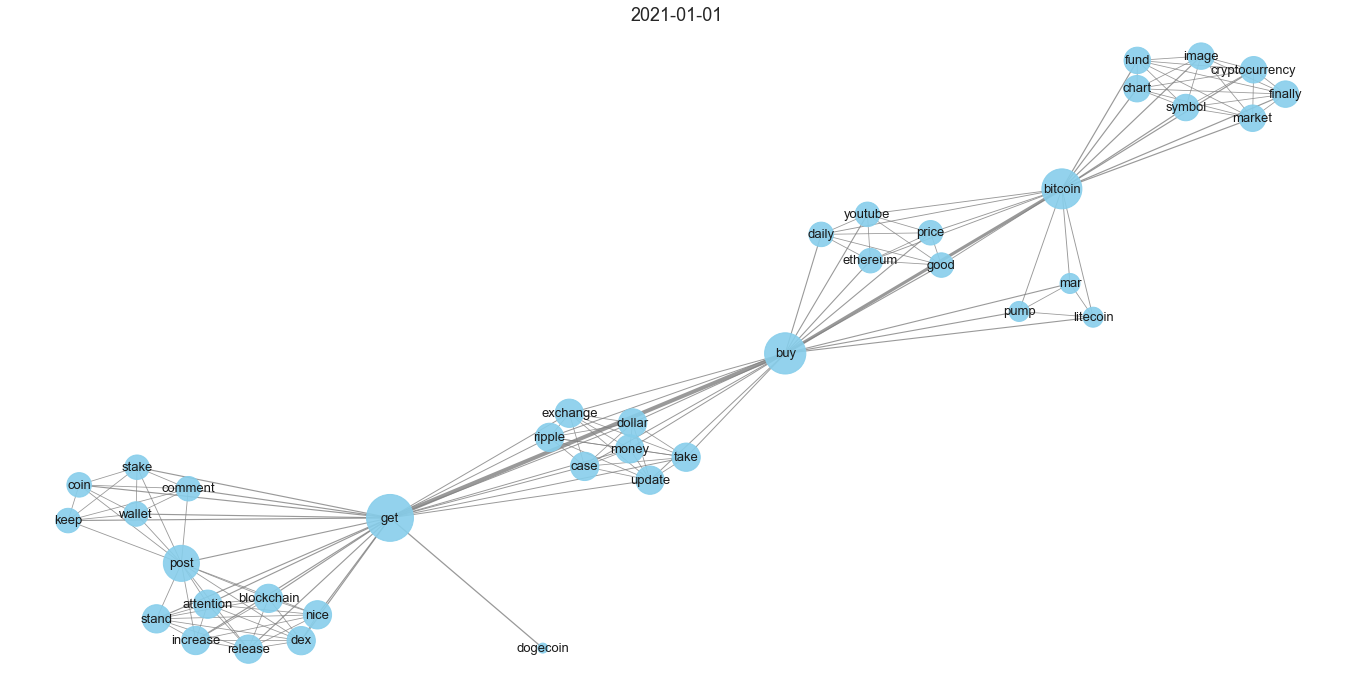

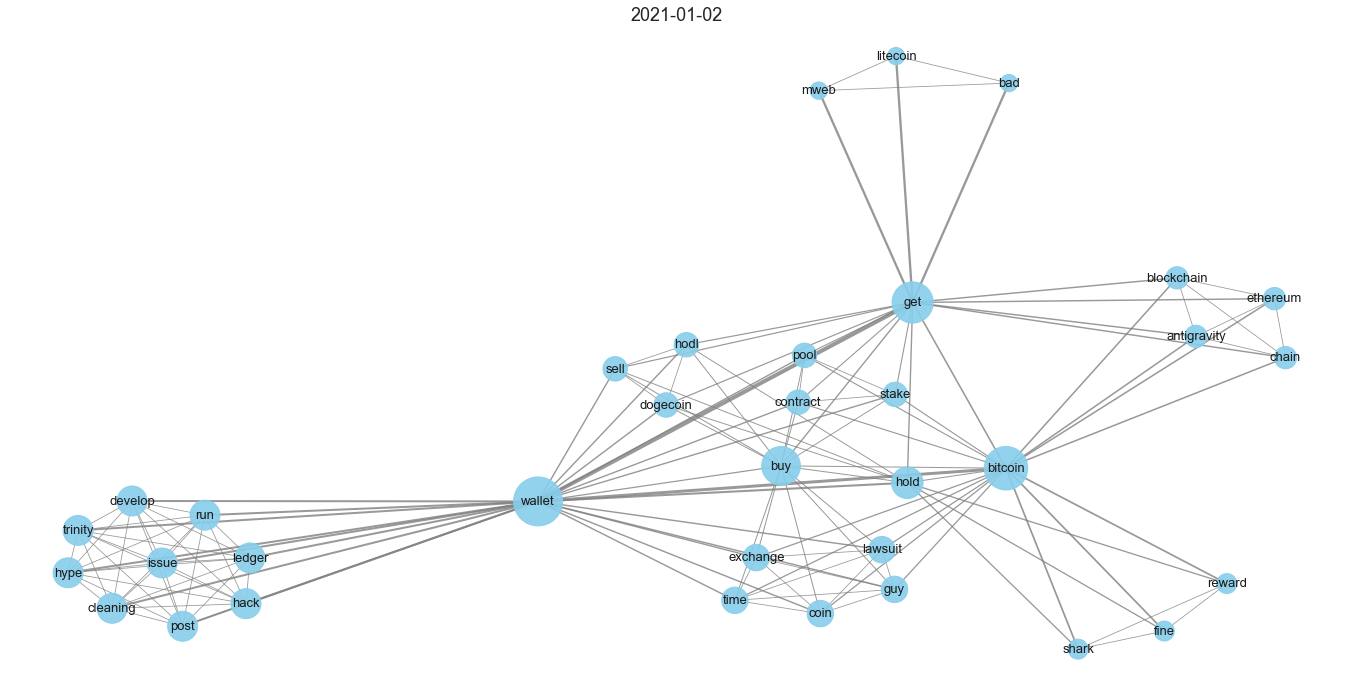

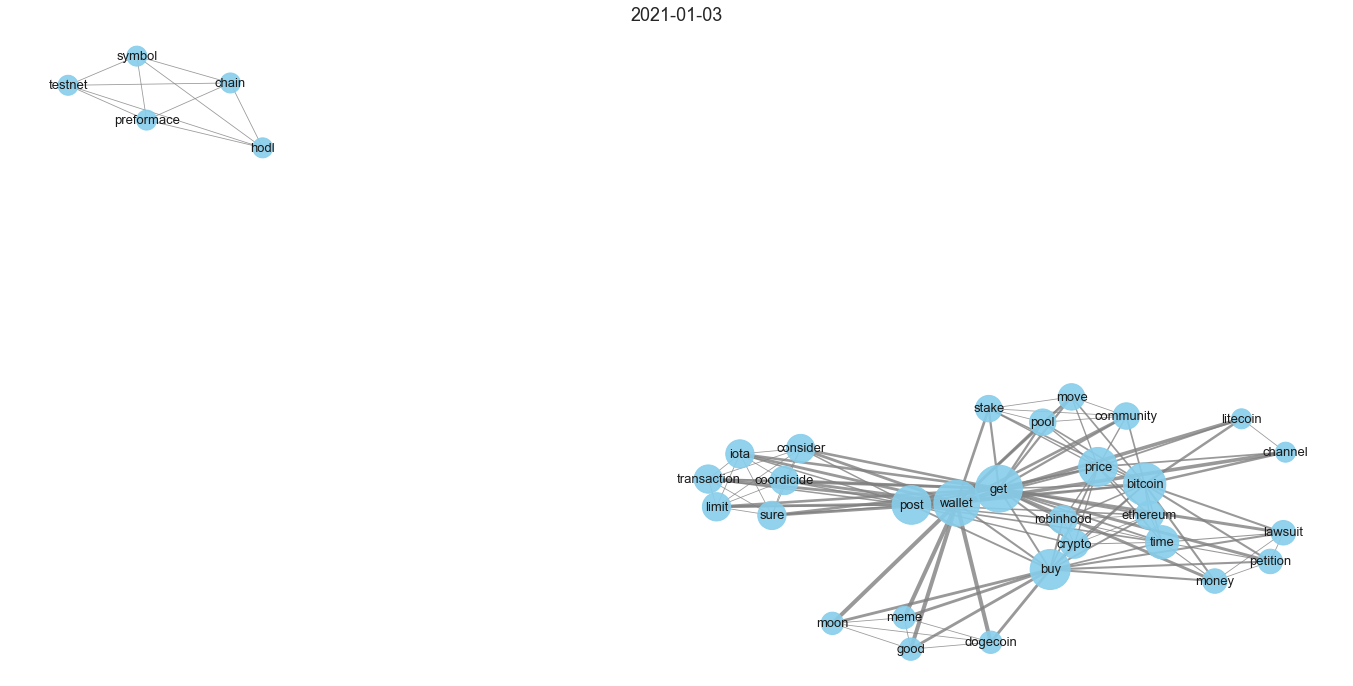

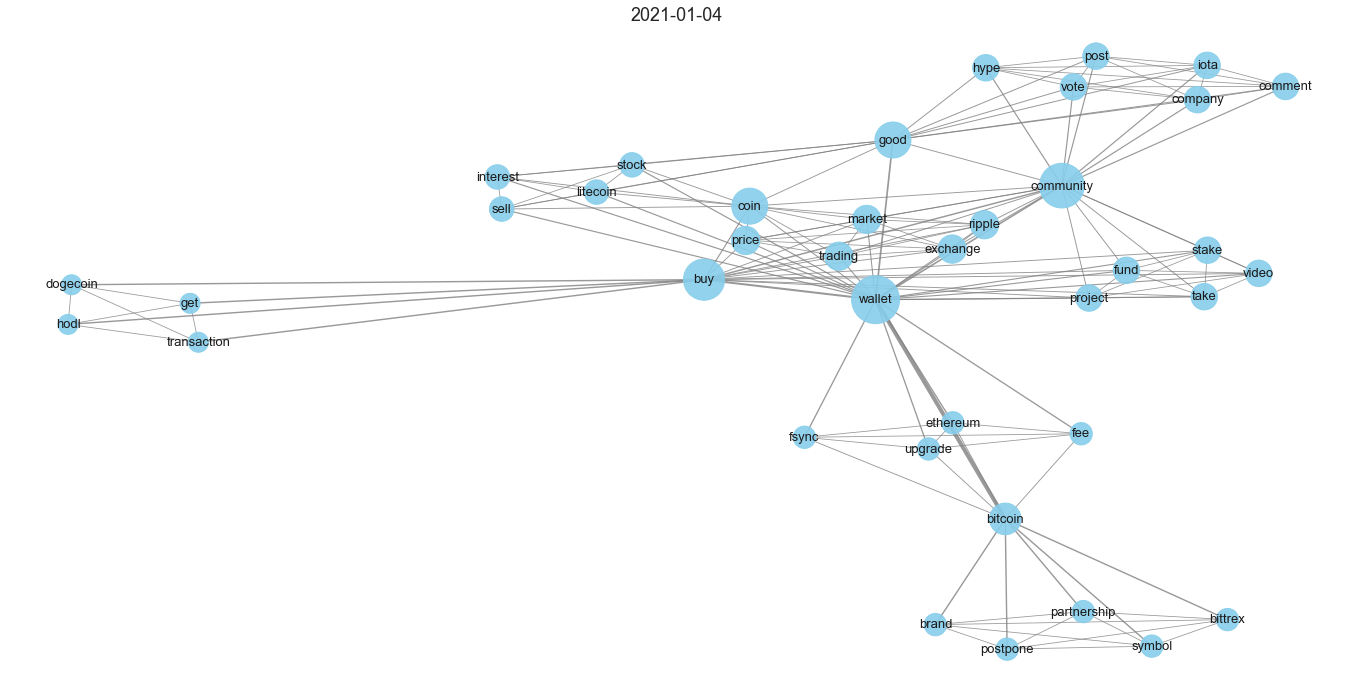

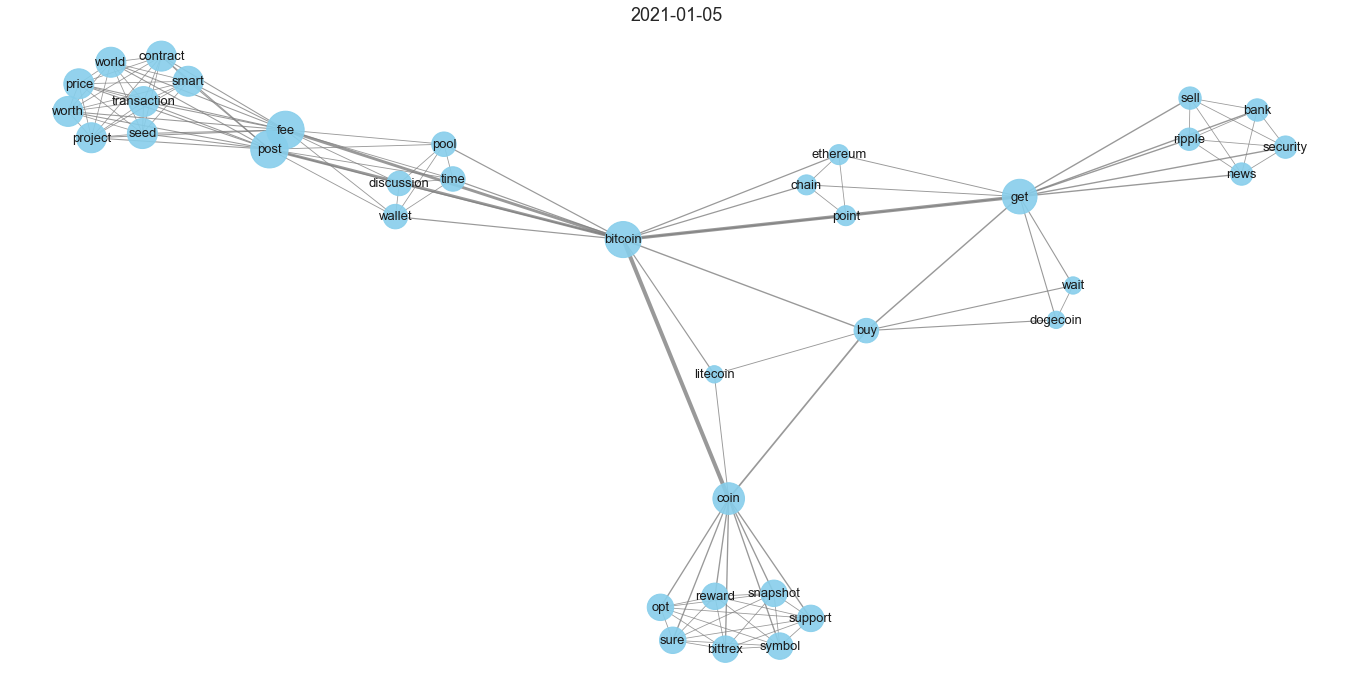

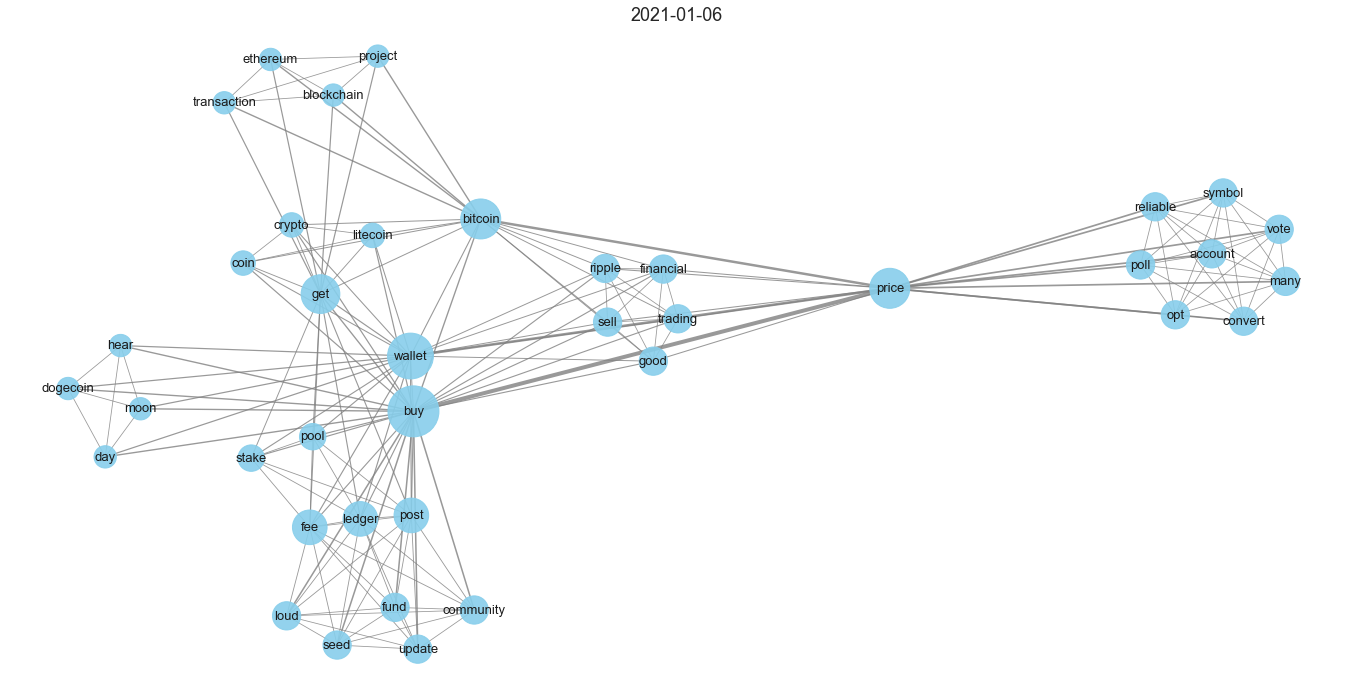

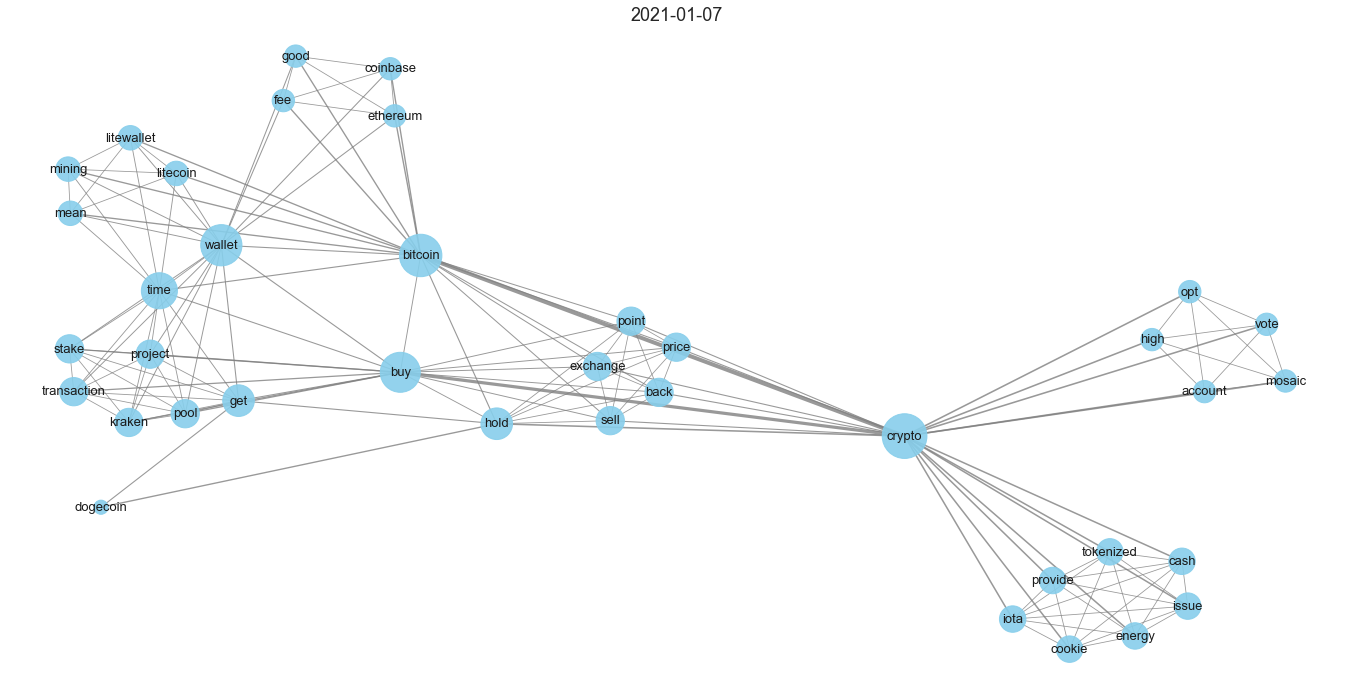

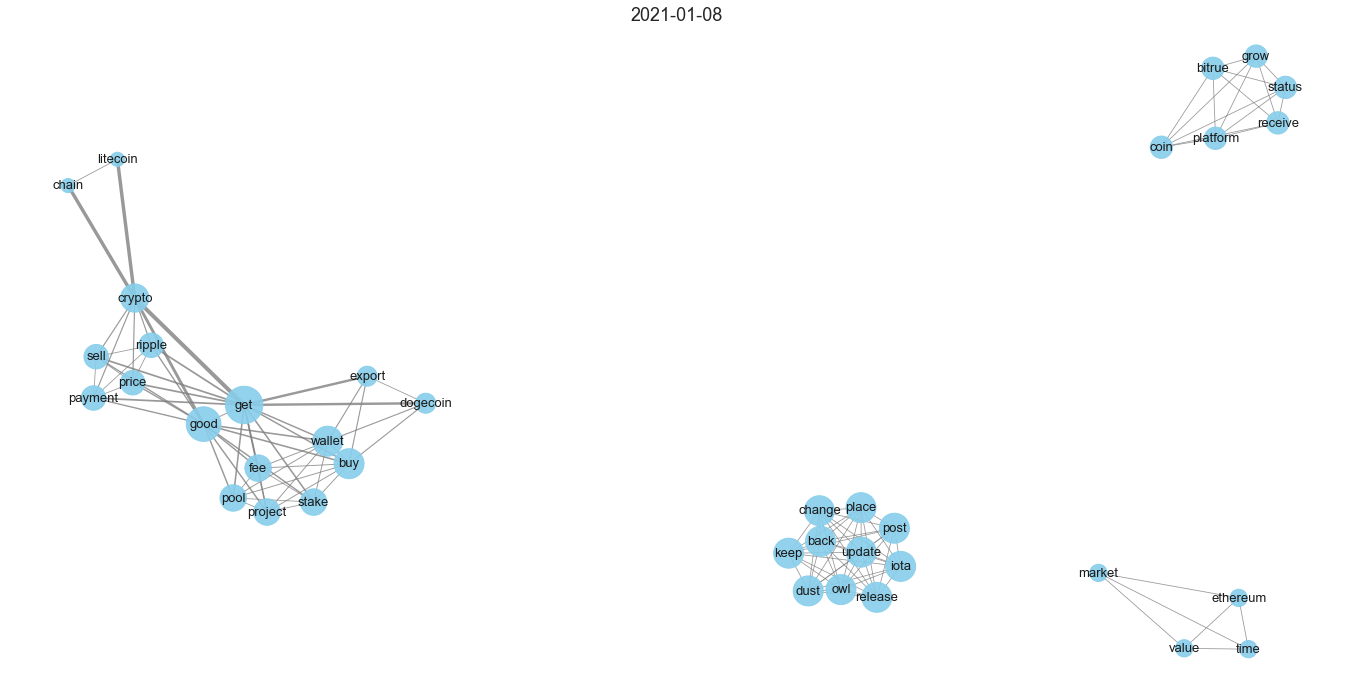

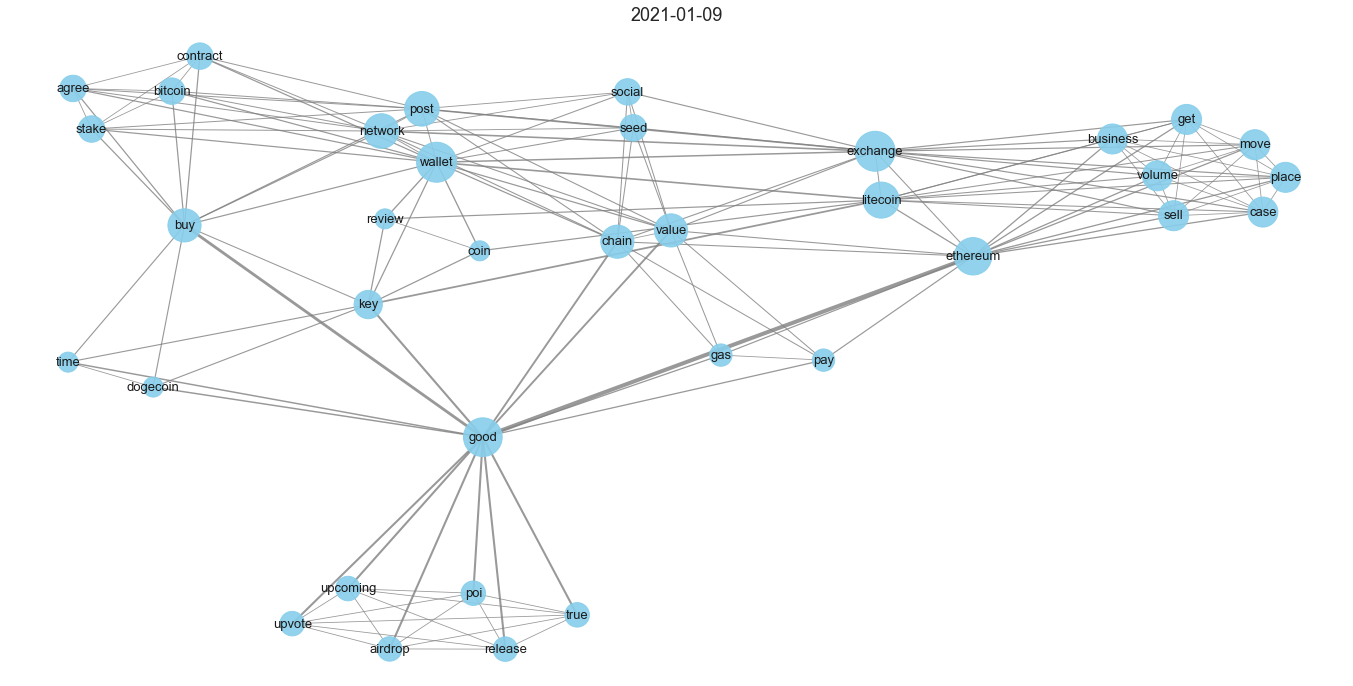

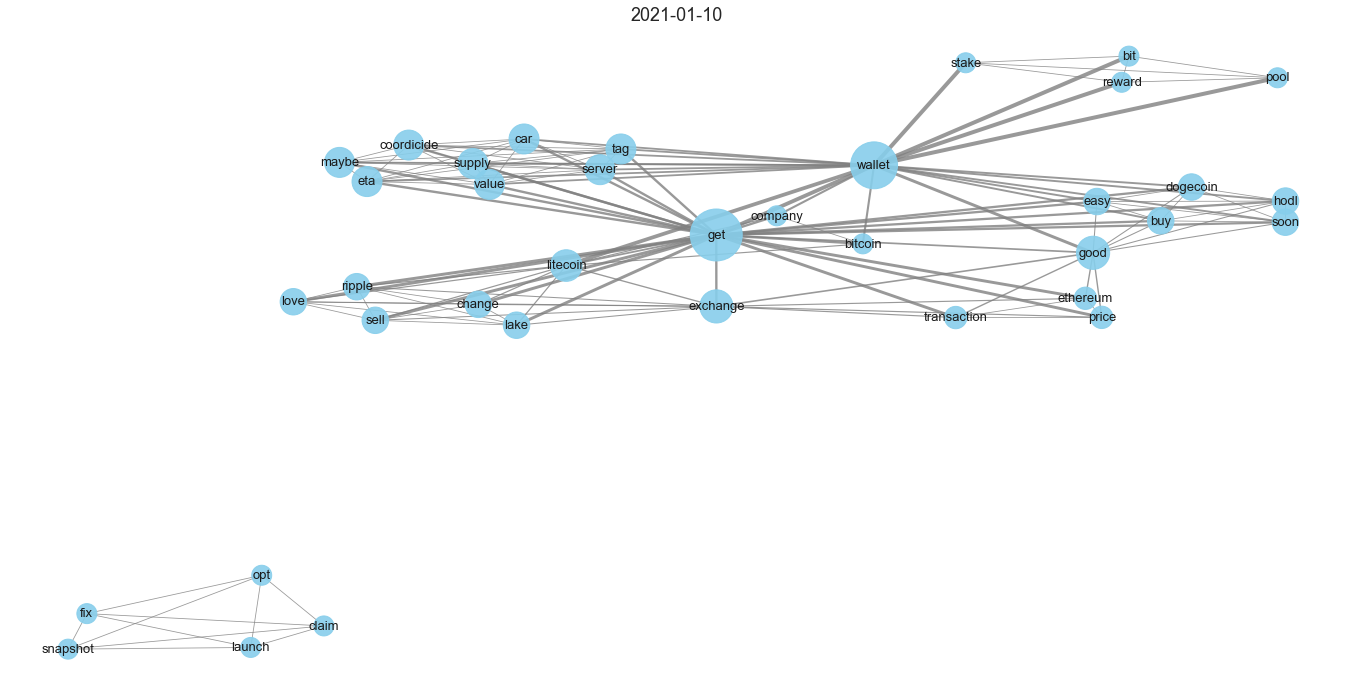

In [60]:
start_date = timespan[0]
end_date = timespan[1]+1
dates = np.arange(start_date, end_date, dtype='datetime64[D]')
t_min = 0.8
t_max = 4

for i in range(10):
    fig = plt.figure(i, figsize=(24, 12))
    plt.axis('off')
    plt.title(dates[i], fontsize = 18)
    pos = nx.spring_layout(G_list[i], k=0.3)
    d = dict(G_list[i].degree)
    
    widths = nx.get_edge_attributes(G_list[i], 'betweenness')
    
    values = widths.values()
    w_min = min(values)
    w_max = max(values)

    norm_widths = {key: ((v - w_min) / (w_max - w_min)) * (t_max - t_min) + t_min  for (key, v) in widths.items()}

    nx.draw_networkx_nodes(G_list[i], pos = pos, node_size =[v * 100 for v in d.values()], with_labels=True, node_color = 'skyblue', alpha = 0.9)
    nx.draw_networkx_edges(G_list[i], pos = pos, width = list(norm_widths.values()), edge_color = 'grey', alpha = 0.8)
    nx.draw_networkx_labels(G_list[i], pos = pos,font_size = 13)
    
    if i < 5:
        plt.savefig('../image_demo_6_months/Network_' + str(dates[i]), dpi = 500)

### • Centrality measure

#### - Degree centrality -
The degree of a node is the number of other nodes to which it is connected

In [112]:
dc = []
for i in range(num_of_timeframes):
    degree_centrality = nx.degree_centrality(G_list[i])
    dc = dc + sorted(degree_centrality.items(), key=lambda x:x[1], reverse=True)[:3]
    
dc = np.reshape(dc, (num_of_timeframes, 6))
df_dc = pd.DataFrame(dc)
df_dc.index = dates
for i in range(1, 6, 2):
    df_dc[i] = df_dc[i].astype(float).round(2)

df_dc.rename(columns={0: 'Top 1', 1: 'Degree centrality 1',
                      2: 'Top 2', 3: 'Degree centrality 2',
                      4: 'Top 3', 5: 'Degree centrality 3',}, inplace=True)
df_dc

,Top 1,Degree centrality 1,Top 2,Degree centrality 2,Top 3,Degree centrality 3
2021-01-01,get,0.58,buy,0.45,bitcoin,0.42
2021-01-02,wallet,0.71,bitcoin,0.56,get,0.50
2021-01-03,get,0.67,wallet,0.64,bitcoin,0.55
2021-01-04,wallet,0.61,community,0.53,buy,0.45
2021-01-05,post,0.40,fee,0.40,bitcoin,0.37
...,...,...,...,...,...,...
2021-06-26,good,0.51,buy,0.47,get,0.42
2021-06-27,get,0.61,hold,0.32,fee,0.32
2021-06-28,get,0.59,many,0.36,bank,0.34
2021-06-29,get,0.43,buy,0.36,transaction,0.33


In [46]:
dfi.export(df_dc.head(), '../image_demo_6_months/degree_centrality.png')

In [47]:
dc_top3_centralities = list(df_dc['Top 1']) + list(df_dc['Top 2']) + list(df_dc['Top 3'])
df_dc_top3_centralities = pd.DataFrame(dc_top3_centralities)
df_dc_value_counts = df_dc_top3_centralities[0].value_counts().rename_axis('Topics').reset_index(name='Counts')
df_dc_value_counts['Percentage'] = df_dc_value_counts['Counts'].div(len(dc_top3_centralities)).apply(lambda x: format(x, '.1%'))
df_dc_value_counts.head(10)

,Topics,Counts,Percentage
0,get,135,24.9%
1,wallet,98,18.0%
2,buy,65,12.0%
3,bitcoin,45,8.3%
4,good,42,7.7%
5,coin,22,4.1%
6,post,13,2.4%
7,fee,11,2.0%
8,token,10,1.8%
9,project,9,1.7%


In [48]:
dfi.export(df_dc_value_counts.head(), '../image_demo_6_months/value_count_degree_centrality.png')

In [49]:
# df_dc['Time interval'][(df_dc['Top 1'] == 'buy')]

==============================================================================================================================================

#### - Betweenness centrality -
Betweenness centrality quantifies the number of times a node acts as a bridge(or "broker") along the shortest path between two other nodes.

In [109]:
bc = []
for i in range(num_of_timeframes):
    betweenness_centrality = nx.betweenness_centrality(G_list[i])
    bc = bc + sorted(betweenness_centrality.items(), key=lambda x:x[1], reverse=True)[:3]
    
bc = np.reshape(bc, (num_of_timeframes, 6))
df_bc = pd.DataFrame(bc)
df_bc.index = dates
for i in range(1, 6, 2):
    df_bc[i] = df_bc[i].astype(float).round(2)

df_bc.rename(columns={0: 'Top 1', 1: 'Betweenness centrality 1',
                      2: 'Top 2', 3: 'Betweenness centrality 2',
                      4: 'Top 3', 5: 'Betweenness centrality 3',}, inplace=True)
df_bc

,Top 1,Betweenness centrality 1,Top 2,Betweenness centrality 2,Top 3,Betweenness centrality 3
2021-01-01,get,0.52,buy,0.51,bitcoin,0.32
2021-01-02,wallet,0.45,get,0.25,bitcoin,0.22
2021-01-03,wallet,0.18,get,0.13,buy,0.08
2021-01-04,wallet,0.48,bitcoin,0.23,buy,0.21
2021-01-05,bitcoin,0.59,coin,0.33,get,0.29
...,...,...,...,...,...,...
2021-06-26,wallet,0.32,good,0.29,get,0.27
2021-06-27,get,0.39,fee,0.11,gas,0.11
2021-06-28,get,0.64,many,0.33,guy,0.33
2021-06-29,transaction,0.35,get,0.30,buy,0.20


In [111]:
dfi.export(df_bc.head(), '../image_demo_6_months/betweenness_centrality.png')

In [52]:
bc_top3_centralities = list(df_bc['Top 1']) + list(df_bc['Top 2']) + list(df_bc['Top 3'])
df_bc_top3_centralities = pd.DataFrame(bc_top3_centralities)
df_bc_value_counts = df_bc_top3_centralities[0].value_counts().rename_axis('Topics').reset_index(name='Counts')
df_bc_value_counts['Percentage'] = df_bc_value_counts['Counts'].div(len(bc_top3_centralities)).apply(lambda x: format(x, '.1%'))
df_bc_value_counts.head(10)

,Topics,Counts,Percentage
0,get,125,23.0%
1,wallet,88,16.2%
2,buy,68,12.5%
3,bitcoin,46,8.5%
4,good,36,6.6%
5,coin,26,4.8%
6,fee,14,2.6%
7,stake,11,2.0%
8,token,10,1.8%
9,post,10,1.8%


In [53]:
dfi.export(df_bc_value_counts.head(), '../image_demo_6_months/value_count_betweenness_centrality.png')

In [54]:
# df_bc['Time interval'][(df_bc['Top 1'] == 'buy')]

### • Changes in topology

In [55]:
n = len(union_topics_list)
num_topics = [len(topics) for topics in union_topics_list]
num_new_topics = [None] * n
num_preexisting_topics = [None] * n
num_disappearing_topics = [None] * n
perc_new_topics = [None] * n
perc_preexisting_topics = [None] * n


for i in range(n-1):
    num_new_topics[i+1] = len(list(set(union_topics_list[i+1]) - set(union_topics_list[i])))
    num_preexisting_topics[i+1] = len(list(set(union_topics_list[i+1]) & set(union_topics_list[i])))
    num_disappearing_topics[i+1] = len(list(set(union_topics_list[i]) - set(union_topics_list[i+1])))
    perc_new_topics[i+1] = num_new_topics[i+1] / num_topics[i-1]
    perc_preexisting_topics[i+1] = num_preexisting_topics[i+1] / num_topics[i-1]

In [113]:
data = {'No. of topics': num_topics,
        'No. of new topics': num_new_topics,
        '% new topics': perc_new_topics,
        'No. of pre-existing topics': num_preexisting_topics,
        '% pre-existing topics': perc_preexisting_topics,
        'No. of disappearing topics': num_disappearing_topics}


df_topology = pd.DataFrame(data)
df_topology.index = dates #['TF ' + str(i+1) for i in range(n)]
df_topology = df_topology.fillna(0)

df_topology['No. of new topics']= df_topology['No. of new topics'].astype(int)
df_topology['No. of pre-existing topics']= df_topology['No. of pre-existing topics'].astype(int)
df_topology['No. of disappearing topics']= df_topology['No. of disappearing topics'].astype(int)

df_topology['% new topics']= df_topology['% new topics'].apply(lambda x: float(format(x*100, '.1f')))
df_topology['% pre-existing topics']= df_topology['% pre-existing topics'].apply(lambda x: float(format(x*100, '.1f')))

df_topology

,No. of topics,No. of new topics,% new topics,No. of pre-existing topics,% pre-existing topics,No. of disappearing topics
2021-01-01,39,0,0.0,0,0.0,0
2021-01-02,35,23,51.1,12,26.7,27
2021-01-03,34,20,51.3,14,35.9,21
2021-01-04,39,23,65.7,16,45.7,18
2021-01-05,36,19,55.9,17,50.0,22
...,...,...,...,...,...,...
2021-06-26,44,31,64.6,13,27.1,32
2021-06-27,39,23,51.1,16,35.6,28
2021-06-28,45,27,61.4,18,40.9,21
2021-06-29,43,29,74.4,14,35.9,31


In [57]:
dfi.export(df_topology.head(5), '../image_demo_6_months/change_of_topology.png')

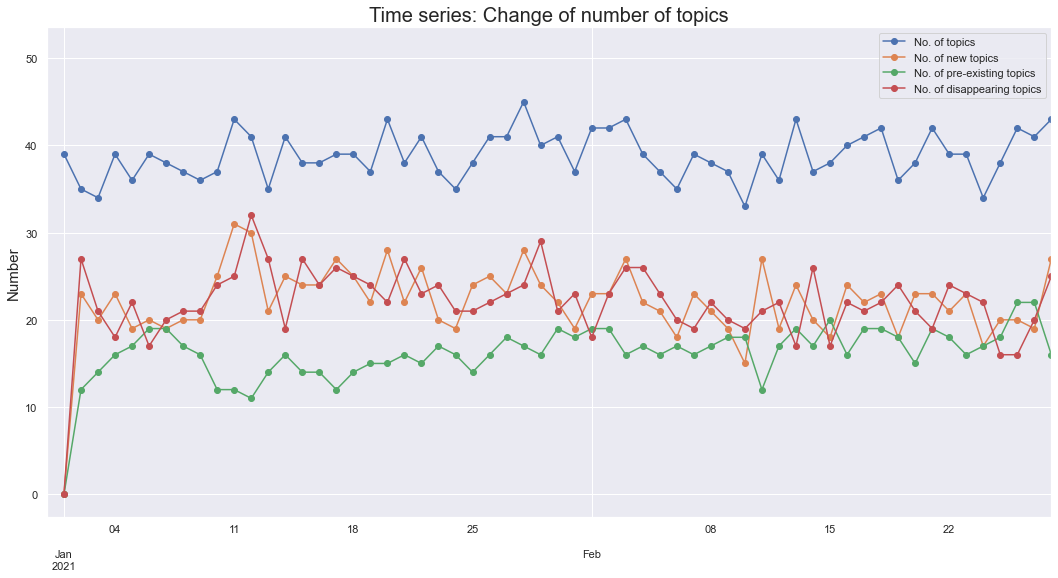

In [78]:
sns.set(rc={'figure.figsize':(18, 9)})
num_plot = ['No. of topics', 'No. of new topics','No. of pre-existing topics', 'No. of disappearing topics']
ax = df_topology[num_plot].plot(marker='o')
ax.set_title('Time series: Change of number of topics', fontsize=20)
ax.set_ylabel('Number', fontsize=15)
ax.set_xlim('2020-12-31', '2021-02-28')
plt.savefig('../image_demo_6_months/Time series 1-2.png', dpi = 500)

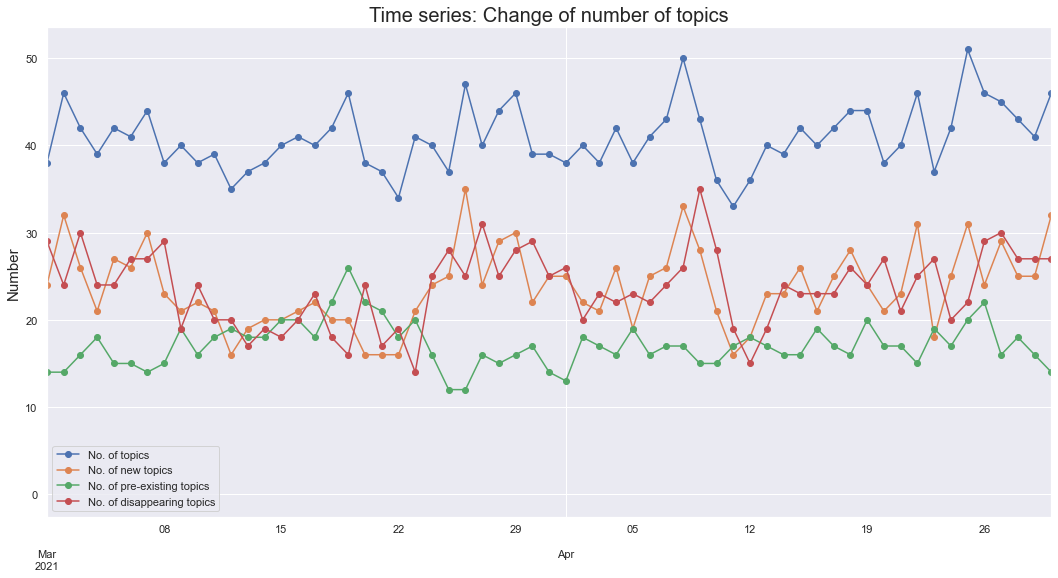

In [79]:
sns.set(rc={'figure.figsize':(18, 9)})
num_plot = ['No. of topics', 'No. of new topics','No. of pre-existing topics', 'No. of disappearing topics']
ax = df_topology[num_plot].plot(marker='o')
ax.set_title('Time series: Change of number of topics', fontsize=20)
ax.set_ylabel('Number', fontsize=15)
ax.set_xlim('2021-03-01', '2021-04-30')
plt.savefig('../image_demo_6_months/Time series 3-4.png', dpi = 500)

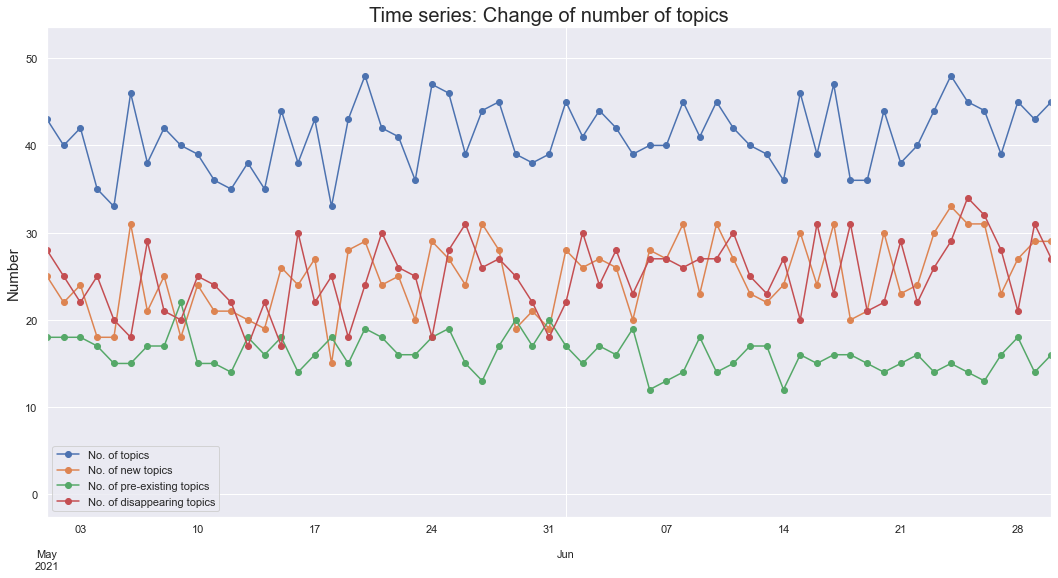

In [80]:
sns.set(rc={'figure.figsize':(18, 9)})
num_plot = ['No. of topics', 'No. of new topics','No. of pre-existing topics', 'No. of disappearing topics']
ax = df_topology[num_plot].plot(marker='o')
ax.set_title('Time series: Change of number of topics', fontsize=20)
ax.set_ylabel('Number', fontsize=15)
ax.set_xlim('2021-05-01', '2021-06-30')
plt.savefig('../image_demo_6_months/Time series 5-6.png', dpi = 500)

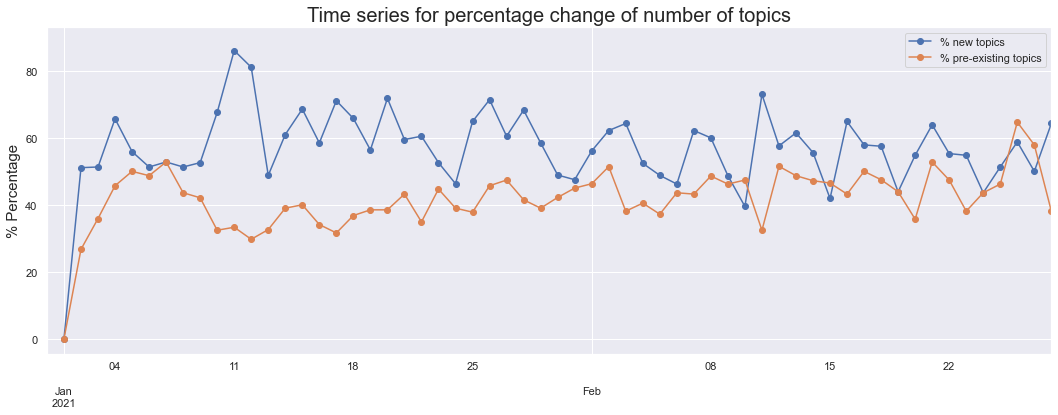

In [81]:
sns.set(rc={'figure.figsize':(18, 6)})
perc_plot = ['% new topics', '% pre-existing topics']
ax = df_topology[perc_plot].plot(marker='o')
ax.set_title('Time series for percentage change of number of topics', fontsize=20)
ax.set_ylabel('% Percentage', fontsize=15)
ax.set_xlim('2020-12-31', '2021-02-28')
plt.savefig('../image_demo_6_months/Time series % 1-2.png', dpi = 500)

# # Set x-axis major ticks to weekly interval, on Mondays
# ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# # Format x-tick labels as 3-letter month name and day number
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

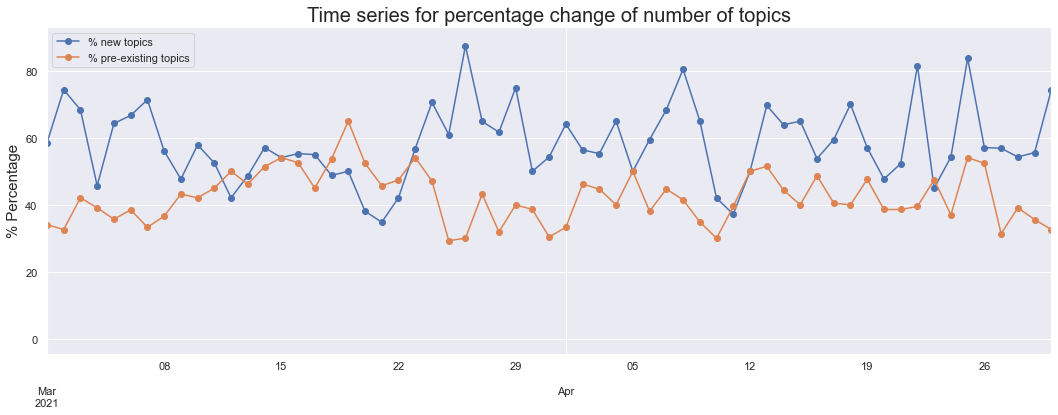

In [82]:
sns.set(rc={'figure.figsize':(18, 6)})
perc_plot = ['% new topics', '% pre-existing topics']
ax = df_topology[perc_plot].plot(marker='o')
ax.set_title('Time series for percentage change of number of topics', fontsize=20)
ax.set_ylabel('% Percentage', fontsize=15)
ax.set_xlim('2021-03-01', '2021-04-30')
plt.savefig('../image_demo_6_months/Time series % 3-4.png', dpi = 500)

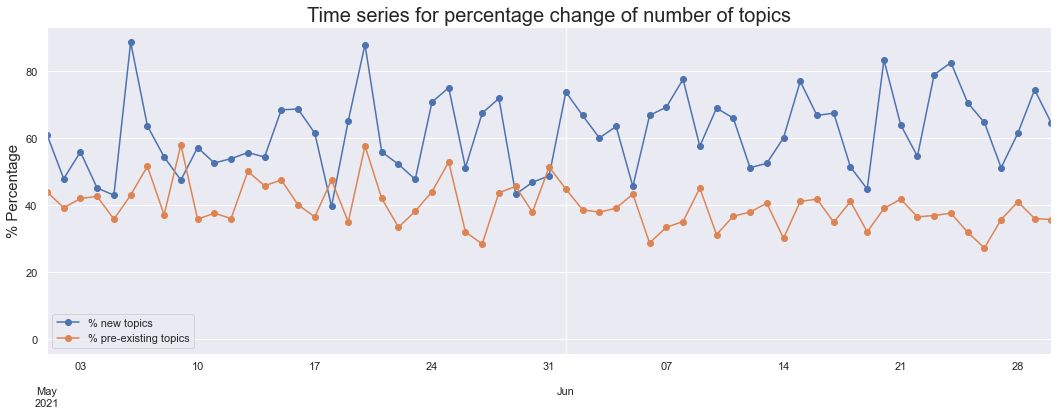

In [83]:
sns.set(rc={'figure.figsize':(18, 6)})
perc_plot = ['% new topics', '% pre-existing topics']
ax = df_topology[perc_plot].plot(marker='o')
ax.set_title('Time series for percentage change of number of topics', fontsize=20)
ax.set_ylabel('% Percentage', fontsize=15)
ax.set_xlim('2021-05-01', '2021-06-30')
plt.savefig('../image_demo_6_months/Time series % 5-6.png', dpi = 500)

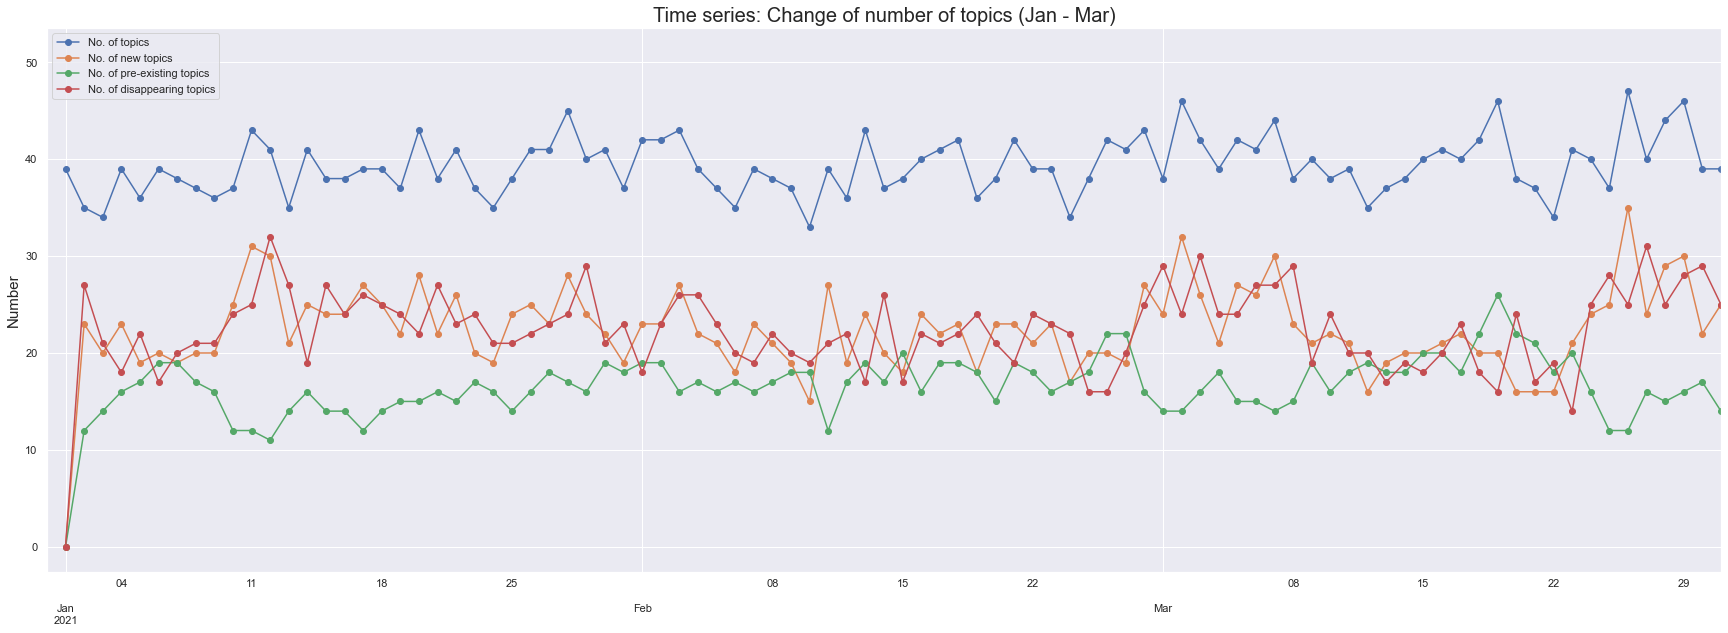

In [105]:
sns.set(rc={'figure.figsize':(30, 10)})
num_plot = ['No. of topics', 'No. of new topics','No. of pre-existing topics', 'No. of disappearing topics']
ax = df_topology[num_plot].plot(marker='o')
ax.set_title('Time series: Change of number of topics (Jan - Mar)', fontsize=20)
ax.set_ylabel('Number', fontsize=15)
ax.set_xlim('2020-12-31', '2021-03-31')
plt.savefig('../image_demo_6_months/Time series 1-3.png', dpi = 500)

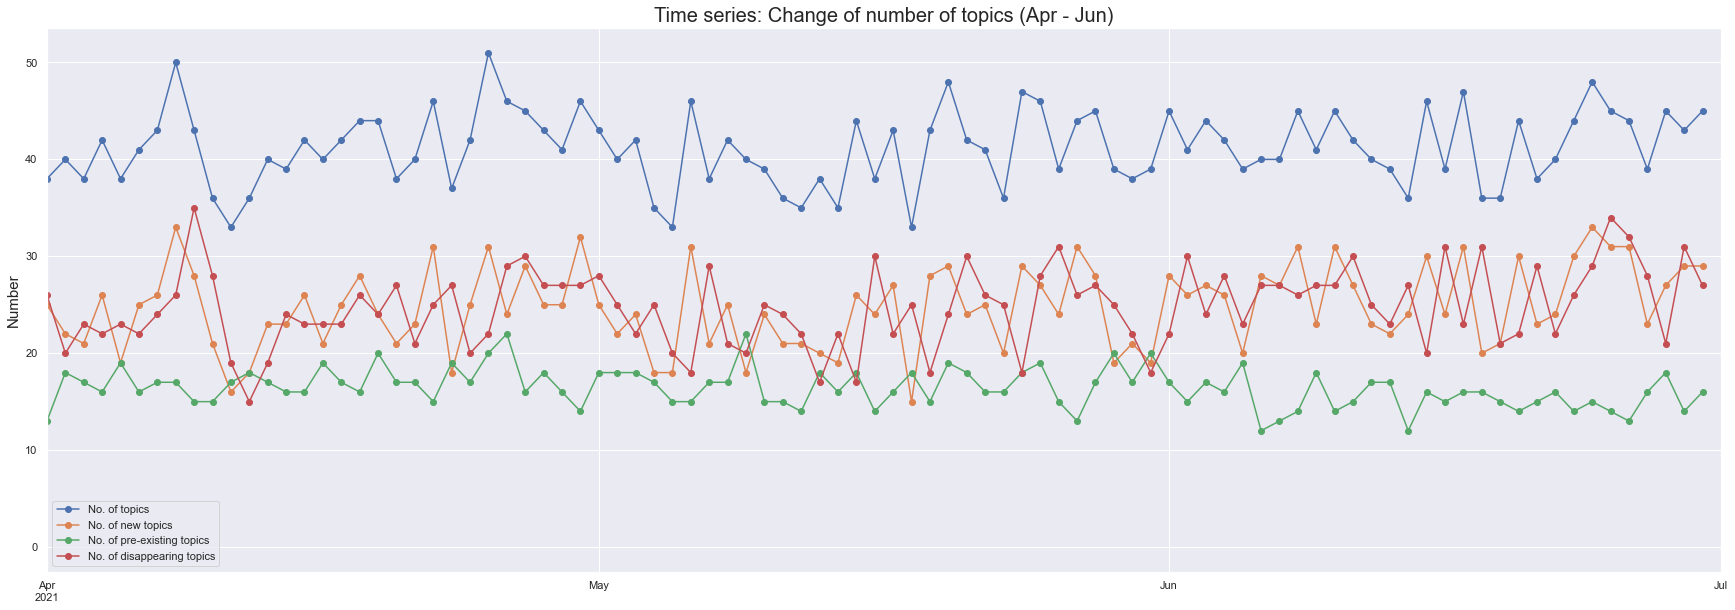

In [106]:
sns.set(rc={'figure.figsize':(30, 10)})
num_plot = ['No. of topics', 'No. of new topics','No. of pre-existing topics', 'No. of disappearing topics']
ax = df_topology[num_plot].plot(marker='o')
ax.set_title('Time series: Change of number of topics (Apr - Jun)', fontsize=20)
ax.set_ylabel('Number', fontsize=15)
ax.set_xlim('2021-04-01', '2021-07-01')
plt.savefig('../image_demo_6_months/Time series 4-6.png', dpi = 500)

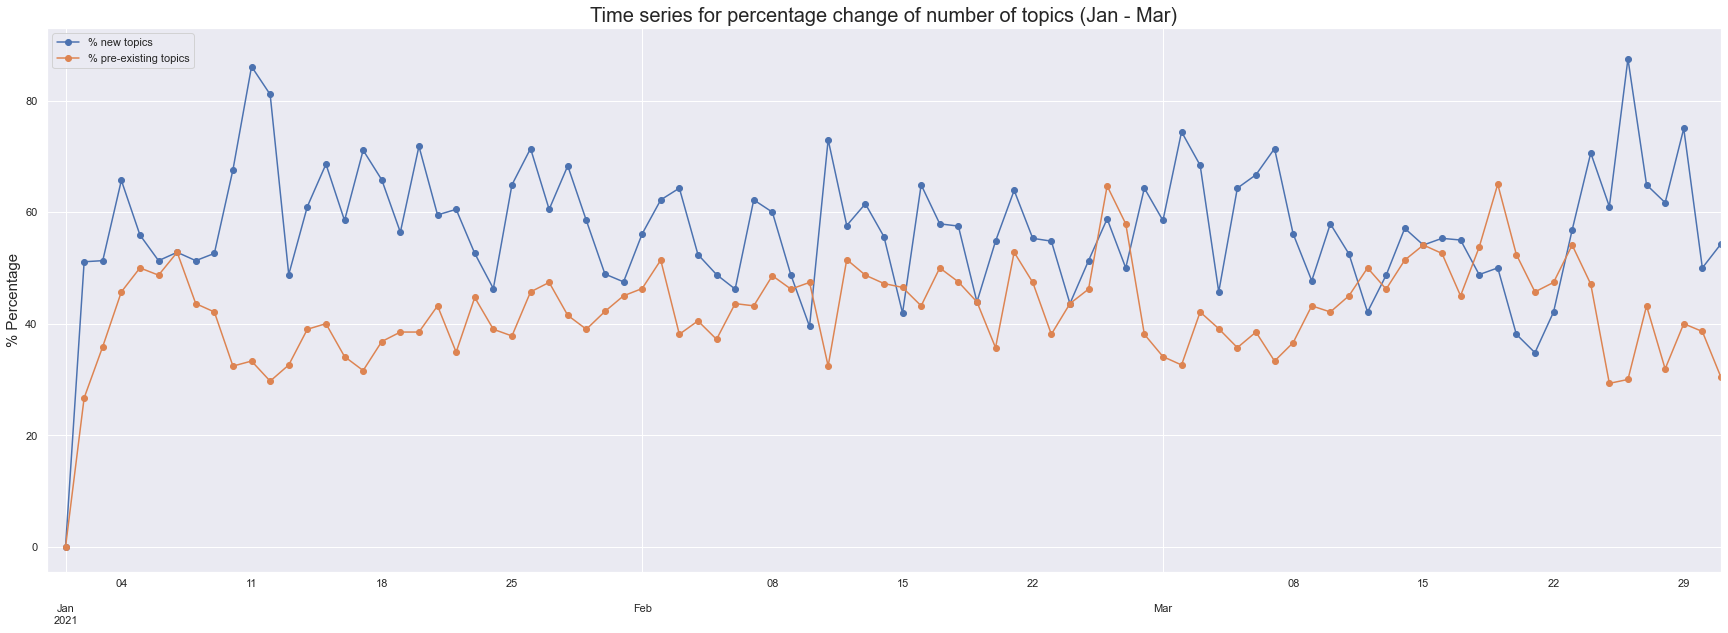

In [107]:
sns.set(rc={'figure.figsize':(30, 10)})
perc_plot = ['% new topics', '% pre-existing topics']
ax = df_topology[perc_plot].plot(marker='o')
ax.set_title('Time series for percentage change of number of topics (Jan - Mar)', fontsize=20)
ax.set_ylabel('% Percentage', fontsize=15)
ax.set_xlim('2020-12-31', '2021-03-31')
plt.savefig('../image_demo_6_months/Time series % 1-3.png', dpi = 500)

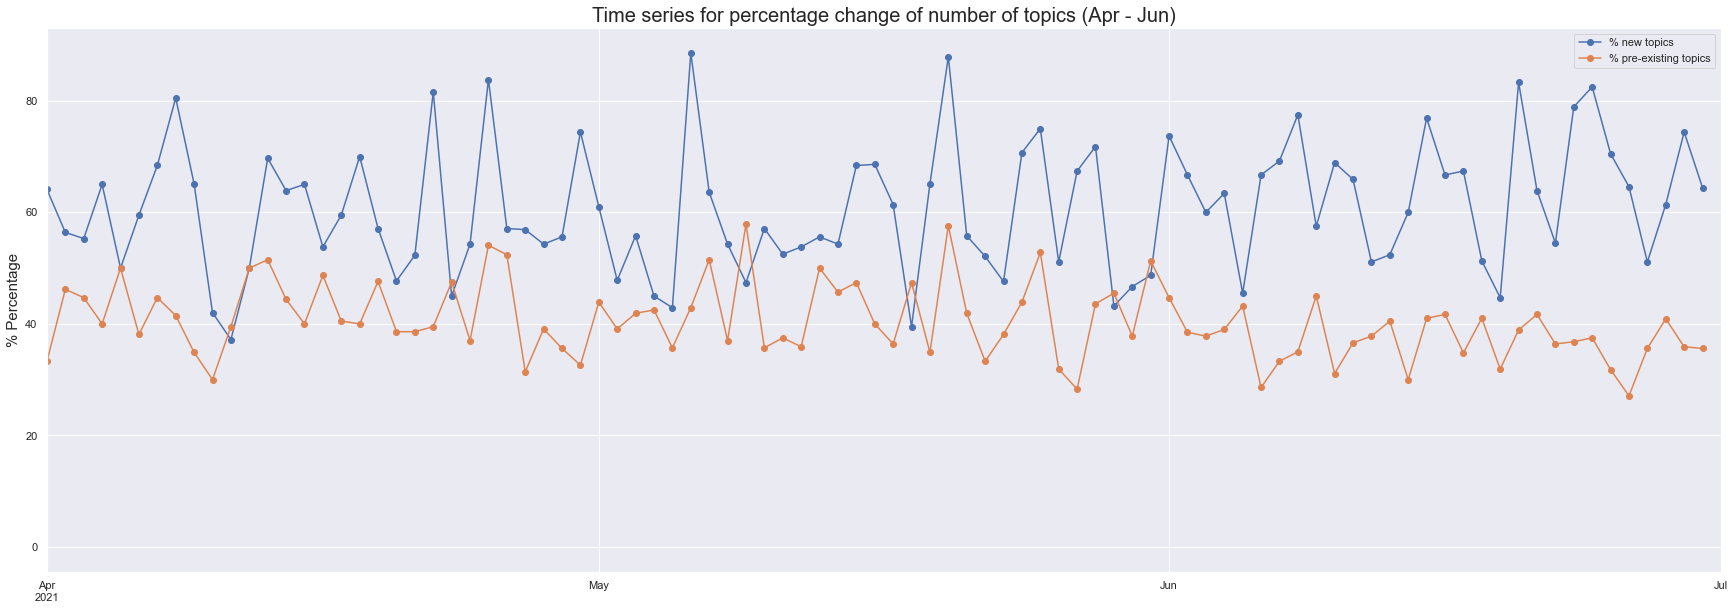

In [108]:
sns.set(rc={'figure.figsize':(30, 10)})
perc_plot = ['% new topics', '% pre-existing topics']
ax = df_topology[perc_plot].plot(marker='o')
ax.set_title('Time series for percentage change of number of topics (Apr - Jun)', fontsize=20)
ax.set_ylabel('% Percentage', fontsize=15)
ax.set_xlim('2021-04-01', '2021-07-01')
plt.savefig('../image_demo_6_months/Time series % 3-6.png', dpi = 500)